In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Book_9train_data_sample1_reduced_9.csv to Book_9train_data_sample1_reduced_9.csv


# Installation of Pyspark through pip

In [ ]:
!pip install pyspark

In [ ]:
!pip install findspark

In [ ]:
import findspark
findspark.init()

# Creating a Spark Session

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# Loading Dataset Through Spark

In [ ]:
data = spark.read.csv('./Book_9train_data_sample1_reduced_9.csv', header=True, inferSchema=True)

In [ ]:
data.show()

+---+-------+-----------------+----------+----------+----------+----------+---------+---------+---------+---------+--------+-----------+---------+---------+------------+------------+--------------------+-------------+
|_c0|time_id|seconds_in_bucket|bid_price1|ask_price1|bid_price2|ask_price2|bid_size1|ask_size1|bid_size2|ask_size2|stock_id|     target|     wap1|     wap2| wap_balance|total_volume|        volitality_1| volitality_2|
+---+-------+-----------------+----------+----------+----------+----------+---------+---------+---------+---------+--------+-----------+---------+---------+------------+------------+--------------------+-------------+
|  1|      5|                1| 1.0014222| 1.0023013| 1.0013704| 1.0023531|        3|      100|        2|      100|       0|0.004135767|1.0014478|1.0013896|5.8174133E-5|         205|2.924799984245053...|          0.0|
|  2|      5|                5| 1.0014222| 1.0023013| 1.0013704| 1.0024048|        3|      100|        2|      100|       0|0.00

In [ ]:
#data.na.drop(subset=["volitality_2"]).show(truncate=False)

# Generating Features

In [ ]:
feature_colums = data.columns[:-2]
feature_colums

['_c0',
 'time_id',
 'seconds_in_bucket',
 'bid_price1',
 'ask_price1',
 'bid_price2',
 'ask_price2',
 'bid_size1',
 'ask_size1',
 'bid_size2',
 'ask_size2',
 'stock_id',
 'target',
 'wap1',
 'wap2',
 'wap_balance',
 'total_volume']

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
assembler = VectorAssembler(inputCols=feature_colums, outputCol="features")

In [ ]:
data2 =  assembler.transform(data)

In [ ]:
data2.count()

10000

In [ ]:
data2.show()

+---+-------+-----------------+----------+----------+----------+----------+---------+---------+---------+---------+--------+-----------+---------+---------+------------+------------+--------------------+-------------+--------------------+
|_c0|time_id|seconds_in_bucket|bid_price1|ask_price1|bid_price2|ask_price2|bid_size1|ask_size1|bid_size2|ask_size2|stock_id|     target|     wap1|     wap2| wap_balance|total_volume|        volitality_1| volitality_2|            features|
+---+-------+-----------------+----------+----------+----------+----------+---------+---------+---------+---------+--------+-----------+---------+---------+------------+------------+--------------------+-------------+--------------------+
|  1|      5|                1| 1.0014222| 1.0023013| 1.0013704| 1.0023531|        3|      100|        2|      100|       0|0.004135767|1.0014478|1.0013896|5.8174133E-5|         205|2.924799984245053...|          0.0|[1.0,5.0,1.0,1.00...|
|  2|      5|                5| 1.0014222| 1

In [ ]:
#import spark.ml.feature.StandardScaler

# Train Test Split 

- **70% train**
- **30% Test**

In [ ]:
train, test = data2.randomSplit([0.7, 0.3])

In [ ]:
train.show()

+---+-------+-----------------+----------+----------+----------+----------+---------+---------+---------+---------+--------+-----------+---------+---------+------------+------------+--------------------+-------------+--------------------+
|_c0|time_id|seconds_in_bucket|bid_price1|ask_price1|bid_price2|ask_price2|bid_size1|ask_size1|bid_size2|ask_size2|stock_id|     target|     wap1|     wap2| wap_balance|total_volume|        volitality_1| volitality_2|            features|
+---+-------+-----------------+----------+----------+----------+----------+---------+---------+---------+---------+--------+-----------+---------+---------+------------+------------+--------------------+-------------+--------------------+
|  1|      5|                1| 1.0014222| 1.0023013| 1.0013704| 1.0023531|        3|      100|        2|      100|       0|0.004135767|1.0014478|1.0013896|5.8174133E-5|         205|2.924799984245053...|          0.0|[1.0,5.0,1.0,1.00...|
|  2|      5|                5| 1.0014222| 1

In [ ]:
train.count()

7032

In [ ]:
test.count()

2968

# Linear Regression

In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
algo = LinearRegression(featuresCol="features", labelCol="volitality_2")
model = algo.fit(train)

In [ ]:
print("Coefficients: " + str(model.coefficients))
print("\nIntercept: " + str(model.intercept))

Coefficients: [5.399729752911043e-09,-1.9995780969869052e-07,-5.360411523120415e-10,-0.14240830891779688,-0.08570666359942523,-0.027084099717492024,-0.11309344348862865,-5.801700807772678e-08,5.403978929500292e-08,-8.584250344640826e-08,2.2801218099654076e-07,0.0,-0.0055761709070017585,-0.10609314469479357,0.47013975915584416,0.03984098027292203,3.202359167738917e-08]

Intercept: 0.004254516827337661


# Evaluation Criteria

In [ ]:
eva = model.evaluate(test)

In [ ]:
mae = eva.meanAbsoluteError
mse = eva.meanSquaredError
rmse = eva.rootMeanSquaredError
r2 = eva.r2

In [ ]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Error:", r2)



Mean Absolute Error: 0.00030306831357029764
Mean Squared Error: 3.120144120185384e-07
Root Mean Squared Error: 0.0005585825024278315
R2 Error: 0.10162060661952621


In [ ]:
pred = model.transform(test)

In [ ]:
pred.show()

+---+-------+-----------------+----------+----------+----------+----------+---------+---------+---------+---------+--------+-----------+---------+---------+------------+------------+--------------------+-------------+--------------------+--------------------+
|_c0|time_id|seconds_in_bucket|bid_price1|ask_price1|bid_price2|ask_price2|bid_size1|ask_size1|bid_size2|ask_size2|stock_id|     target|     wap1|     wap2| wap_balance|total_volume|        volitality_1| volitality_2|            features|          prediction|
+---+-------+-----------------+----------+----------+----------+----------+---------+---------+---------+---------+--------+-----------+---------+---------+------------+------------+--------------------+-------------+--------------------+--------------------+
|  3|      5|                6| 1.0014222| 1.0023013| 1.0013704| 1.0024048|        3|      126|        2|      100|       0|0.004135767|1.0014426|1.0013907| 5.185604E-5|         231|2.924799984245053...|          0.0|[3.

# Plotting Actual and Predicted

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
prediced = pred.select(pred.columns[20:]).show()

+--------------------+
|          prediction|
+--------------------+
|-1.84784656537624...|
|-1.84757618570675...|
|-1.87333112831629...|
|-1.84747891193410...|
|-3.52921329746717...|
|1.642017936875532...|
|8.996418702539571E-5|
|-2.50926722096698...|
|3.216336800374204...|
|-9.76797603868331...|
|-1.85558400048656...|
|-1.40503068802698...|
|-3.08064518652938...|
|-3.05289904442276...|
|-3.06941805278656...|
|1.176354778774889...|
|-5.01188603860376...|
|1.299976823526836...|
|-3.39760666423225...|
|1.146656739013495...|
+--------------------+
only showing top 20 rows



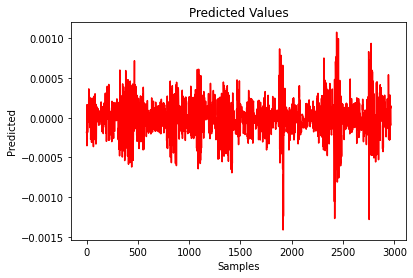

In [ ]:
y_actual = [val.volitality_2 for val in test.select('volitality_2').collect()]
y_pred = [pre.prediction for pre in pred.select('prediction').collect()]

plt.plot(y_pred, color='red', label='Predicted')
#plt.plot(y_actual, color='blue', label='True Values')

plt.ylabel('Predicted')
plt.xlabel('Samples')
plt.title('Predicted Values')
#plt.legend(['asn_val'], loc='upper left')

plt.show()

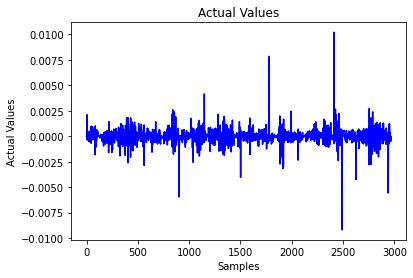

In [ ]:
plt.plot(y_actual, color='blue', label='True Values')

plt.ylabel('Actual Values')
plt.xlabel('Samples')
plt.title('Actual Values')
#plt.legend(['asn_val'], loc='upper left')

plt.show()

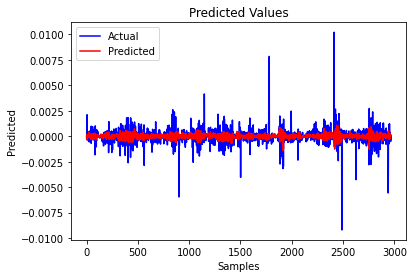

In [ ]:
plt.plot(y_actual, color='blue', label='True Values')

plt.plot(y_pred, color='red', label='Predicted')

plt.ylabel('Predicted')
plt.xlabel('Samples')
plt.title('Predicted Values')
plt.legend(['Actual', 'Predicted'], loc='upper left')

plt.show()